<a href="https://colab.research.google.com/github/Vinay-Grewal/Brain_MRI-Tumour-CNN-Model/blob/main/BT_CNN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import kagglehub

# Download dataset
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")

print("Path to dataset files:", path)

# Training & Testing paths
train_dir = os.path.join(path, "Training")
test_dir = os.path.join(path, "Testing")

# Count training files
train_count = sum(len(files) for _, _, files in os.walk(train_dir))

# Count testing files
test_count = sum(len(files) for _, _, files in os.walk(test_dir))

print(f"Total training files: {train_count}")
print(f"Total testing files: {test_count}")
print(f"Total files: {train_count + test_count}")



Path to dataset files: /kaggle/input/brain-tumor-mri-dataset
Total training files: 5712
Total testing files: 1311
Total files: 7023


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [ ]:
# Importing essential libraries
import ipywidgets as widgets  # For creating interactive widgets
import io  # For handling input/output operations
from PIL import Image  # For image manipulation and processing
import tqdm  # For displaying progress bars
from sklearn.model_selection import train_test_split  # For splitting datasets
import cv2  # For image processing using OpenCV
from sklearn.utils import shuffle  # For shuffling data
import tensorflow as tf  # For building and training deep learning models

In [ ]:
X_train = []
Y_train = []
X_test = []
Y_test = []
image_size = 150
labels = ['glioma','meningioma','notumor','pituitary']



for i in labels:
    folderPath = os.path.join(path, 'Training', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join(path, 'Testing', i)

    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_test.append(img)
        Y_test.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [ ]:
# Convert Y_train to numbers
y_train_new = [labels.index(i) for i in Y_train]
Y_train = tf.keras.utils.to_categorical(y_train_new)

# Convert Y_test to numbers
y_test_new = [labels.index(i) for i in Y_test]
Y_test = tf.keras.utils.to_categorical(y_test_new)


In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
# history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_test, Y_test))


Epoch 1/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 36s 144ms/step - accuracy: 0.3078 - loss: 2.5925 - val_accuracy: 0.5385 - val_loss: 1.0850
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 21s 74ms/step - accuracy: 0.6696 - loss: 0.8054 - val_accuracy: 0.6285 - val_loss: 0.9151
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - accuracy: 0.7268 - loss: 0.6655 - val_accuracy: 0.7239 - val_loss: 0.6448
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 20s 75ms/step - accuracy: 0.7875 - loss: 0.5153 - val_accuracy: 0.6171 - val_loss: 0.9350
Epoch 5/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 13s 75ms/step - accuracy: 0.8323 - loss: 0.4257 - val_accuracy: 0.7086 - val_loss: 0.8168
Epoch 6/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 14s 76ms/step - accuracy: 0.8448 - loss: 0.3829 - val_accuracy: 0.8261 - val_loss: 0.4083
Epoch 7/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 14s 77ms/step - accuracy: 0.8803 - loss: 0.3226 - val_accuracy: 0.8108 - val_loss: 0.4988
Epoch 8/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 14s 77ms/step - accuracy: 0.8731 - loss: 0.3175 -

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

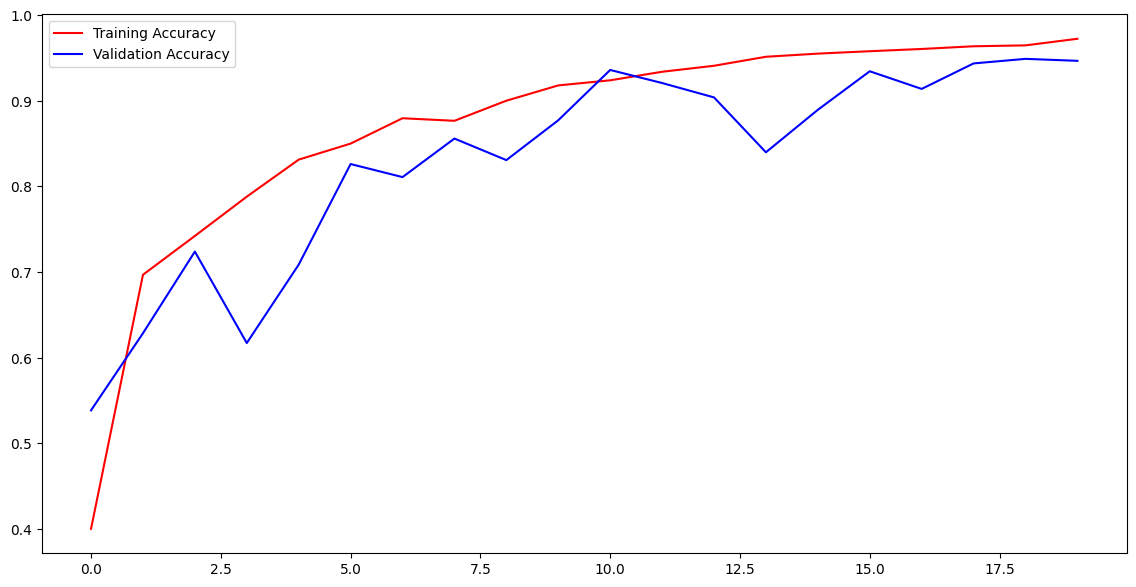

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

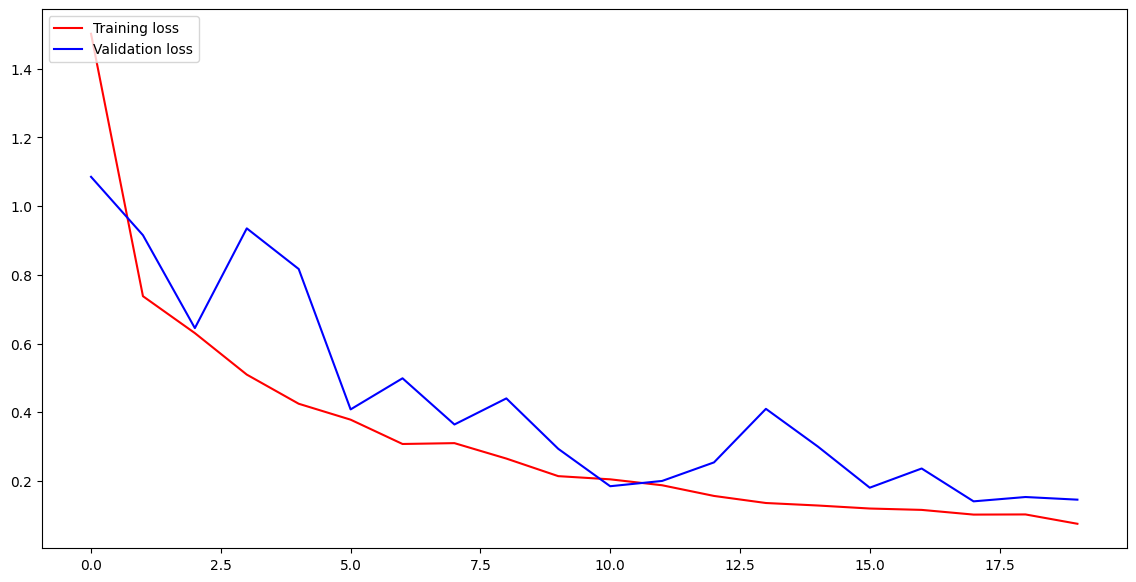

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [ ]:
y_pred_probs = model.predict(X_test)                # Predicted probabilities
y_pred_classes = np.argmax(y_pred_probs, axis=1)    # Convert probabilities to class indices
y_true_classes = np.argmax(Y_test, axis=1)          # Convert one-hot test labels to class indices


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


In [ ]:
# Accuracy score
acc = accuracy_score(y_true_classes, y_pred_classes)
print("Test Accuracy:", acc)

Test Accuracy: 0.9466056445461479


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:\n", cm)

# Classification Report (Precision, Recall, F1-score)
print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes, target_names=labels))

# Macro Precision, Recall, F1-score
precision = precision_score(y_true_classes, y_pred_classes, average='macro')
recall = recall_score(y_true_classes, y_pred_classes, average='macro')
f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

print("Macro Precision:", precision)
print("Macro Recall:", recall)
print("Macro F1 Score:", f1)

Confusion Matrix:
 [[281  18   0   1]
 [ 22 268   2  14]
 [  3   1 399   2]
 [  4   3   0 293]]
Classification Report:
               precision    recall  f1-score   support

      glioma       0.91      0.94      0.92       300
  meningioma       0.92      0.88      0.90       306
     notumor       1.00      0.99      0.99       405
   pituitary       0.95      0.98      0.96       300

    accuracy                           0.95      1311
   macro avg       0.94      0.94      0.94      1311
weighted avg       0.95      0.95      0.95      1311

Macro Precision: 0.9426908257720549
Macro Recall: 0.9435838779956427
Macro F1 Score: 0.9428426284656254


In [ ]:
model.save("BT-CNN_Mode.h5")